In [1]:
import diffusers
import torch
import transformers
from clip_guided_stable_diffusion_turbo import CLIPGuidedStableDiffusion

from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer # works on open-clip-torch>=2.23.0, timm>=0.9.8

/usr/lib/python3/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /usr/lib/python3/dist-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")
/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


[2023-12-24 05:18:02,827] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
dtype = torch.bfloat16
device = "cuda"

hf_clip_model=transformers.CLIPModel.from_pretrained
hf_clip_tokenizer = transformers.CLIPTokenizer.from_pretrained

# clip_model = [hf_clip_model("openai/clip-vit-large-patch14").to(device, dtype), hf_clip_model("openai/clip-vit-base-patch16").to(device, dtype)]
# clip_sizes = [224, 224]
# clip_tokenizers = [hf_clip_tokenizer("openai/clip-vit-large-patch14"), hf_clip_tokenizer("openai/clip-vit-base-patch16")]

clip_model = [hf_clip_model("openai/clip-vit-large-patch14").to(device, dtype)]
clip_sizes = [224]
clip_tokenizers = [hf_clip_tokenizer("openai/clip-vit-large-patch14")]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
# clip_model = create_model_from_pretrained('hf-hub:timm/ViT-B-16-SigLIP')[0]
# clip_tokenizer = get_tokenizer('hf-hub:timm/ViT-B-16-SigLIP')
# clip_sizes = [224]

In [4]:
pipe = CLIPGuidedStableDiffusion.from_pretrained("stabilityai/sd-turbo").to(device, dtype)
pipe.add_clip_models(clip_models=clip_model, clip_sizes=clip_sizes, clip_tokenizers=clip_tokenizers)
pipe.scheduler = diffusers.DDIMScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [64]:
torch.manual_seed(10)

clip_guidance_scale = 20
optimization_steps = 7
do_clip_guidance = True

image = pipe(
    prompt = "incredible HD photo of a fire wizard",
    clip_prompt = "incredible HD photo of a fire wizard",
    clip_guidance_scale=clip_guidance_scale if do_clip_guidance else 0.0001,
    # clip_guidance_scale=0.0001,
    eta = 1.0,
    clamp_value=100,
    num_inference_steps=3,
    guidance_scale=0.0,
    optimization_steps=optimization_steps if do_clip_guidance else 1,
    # optimization_steps=1,
).images

  0%|          | 0/3 [00:00<?, ?it/s]

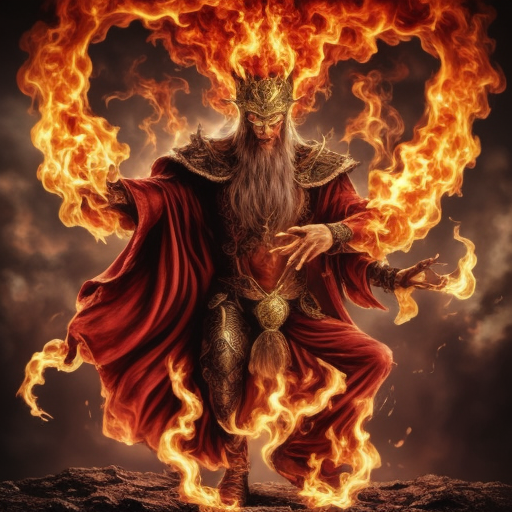

In [61]:
image[0]

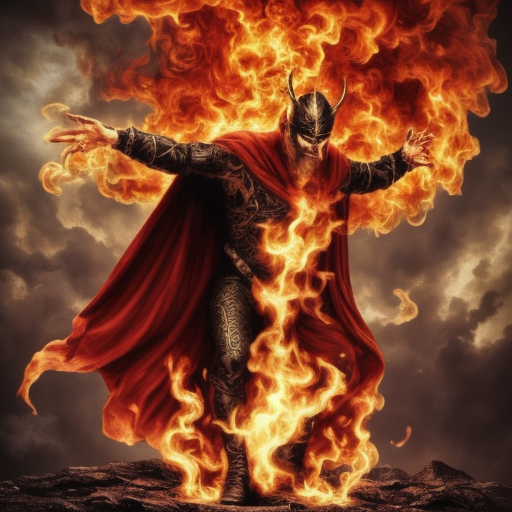

In [65]:
image[0]

In [71]:
torch.manual_seed(10)

clip_guidance_scale = 100
optimization_steps = 10
do_clip_guidance = True

image = pipe(
    prompt = "",
    clip_prompt = "incredible HD photo of a fire wizard",
    clip_guidance_scale=clip_guidance_scale if do_clip_guidance else 0.0001,
    # clip_guidance_scale=0.0001,
    eta = 1.0,
    clamp_value=100,
    num_inference_steps=2,
    guidance_scale=0.0,
    optimization_steps=optimization_steps if do_clip_guidance else 1,
    # optimization_steps=1,
).images

  0%|          | 0/2 [00:00<?, ?it/s]

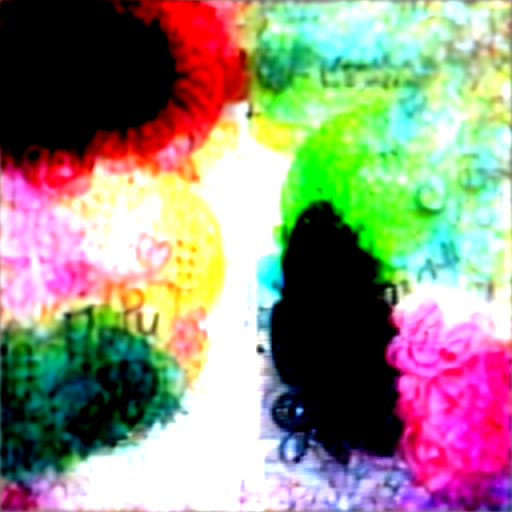

In [72]:
image[0]